In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px
from MCForecastTools import MCSimulation
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

In [5]:
# Set alpaca key / code
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_code = os.getenv("ALPACA_CODE")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_code,
    api_version = "v2"
)

In [6]:
#Connect API
api = REST(key_id=alpaca_api_key,secret_key=alpaca_code,base_url="https://paper-api.alpaca.markets")

In [7]:
#Create API data for each crypto

btcbars = api.get_crypto_bars("BTCUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
ethbars = api.get_crypto_bars("ETHUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
solbars = api.get_crypto_bars("SOLUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
bchbars = api.get_crypto_bars("BCHUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
dogebars = api.get_crypto_bars("DOGEUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
linkbars = api.get_crypto_bars("LINKUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
ltcbars = api.get_crypto_bars("LTCUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
trxbars = api.get_crypto_bars("TRXUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
unibars = api.get_crypto_bars("UNIUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
batbars = api.get_crypto_bars("BATUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [8]:
# Get Crypto Volume and Closing Price
btcbars = btcbars.loc[btcbars['exchange'] == 'CBSE']
btcbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
btcbars = btcbars.rename(columns={
    "volume": "BTC_volume",
    "close": "BTC_close"
})
btcbars['timestamp'] = btcbars.index.date
btcbars = btcbars.set_index(btcbars['timestamp'])
btcbars.drop(columns = ['timestamp'], inplace=True)



# Get ETH Volume and Closing Price
ethbars = ethbars.loc[ethbars['exchange'] == 'CBSE']
ethbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
ethbars = ethbars.rename(columns={
    "volume": "ETH_volume",
    "close": "ETH_close"
})
ethbars['timestamp'] = ethbars.index.date
ethbars = ethbars.set_index(ethbars['timestamp'])
ethbars.drop(columns = ['timestamp'], inplace=True)



# Get SOL Volume and Closing Price
solbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
solbars = solbars.rename(columns={
    "volume": "SOL_volume",
    "close": "SOL_close"
})
solbars['timestamp'] = solbars.index.date
solbars = solbars.set_index(solbars['timestamp'])
solbars.drop(columns = ['timestamp'], inplace=True)



# Get BCH Volume and Closing Price
bchbars = bchbars.loc[bchbars['exchange'] == 'CBSE']
bchbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
bchbars = bchbars.rename(columns={
    "volume": "BCH_volume",
    "close": "BCH_close"
})
bchbars['timestamp'] = bchbars.index.date
bchbars = bchbars.set_index(bchbars['timestamp'])
bchbars.drop(columns = ['timestamp'], inplace=True)



# Get DOGE Volume and Closing Price
dogebars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
dogebars = dogebars.rename(columns={
    "volume": "DOGE_volume",
    "close": "DOGE_close"
})
dogebars['timestamp'] = dogebars.index.date
dogebars = dogebars.set_index(dogebars['timestamp'])
dogebars.drop(columns = ['timestamp'], inplace=True)



# Get LINK Volume and Closing Price
linkbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
linkbars = linkbars.rename(columns={
    "volume": "LINK_volume",
    "close": "LINK_close"
})
linkbars['timestamp'] = linkbars.index.date
linkbars = linkbars.set_index(linkbars['timestamp'])
linkbars.drop(columns = ['timestamp'], inplace=True)



# Get LTC Volume and Closing Price
ltcbars = ltcbars.loc[ltcbars['exchange'] == 'CBSE']
ltcbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
ltcbars = ltcbars.rename(columns={
    "volume": "LTC_volume",
    "close": "LTC_close"
})
ltcbars['timestamp'] = ltcbars.index.date
ltcbars = ltcbars.set_index(ltcbars['timestamp'])
ltcbars.drop(columns = ['timestamp'], inplace=True)



# Get TRX Volume and Closing Price
trxbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
trxbars = trxbars.rename(columns={
    "volume": "TRX_volume",
    "close": "TRX_close"
})
trxbars['timestamp'] = trxbars.index.date
trxbars = trxbars.set_index(trxbars['timestamp'])
trxbars.drop(columns = ['timestamp'], inplace=True)



# Get UNI Volume and Closing Price
unibars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
unibars = unibars.rename(columns={
    "volume": "UNI_volume",
    "close": "UNI_close"
})
unibars['timestamp'] = unibars.index.date
unibars = unibars.set_index(unibars['timestamp'])
unibars.drop(columns = ['timestamp'], inplace=True)



# Get BAT Volume and Closing Price
batbars.drop(columns = ['exchange', 'open', 'high', 'low', 'trade_count', 'vwap'], inplace=True)
batbars = batbars.rename(columns={
    "volume": "BAT_volume",
    "close": "BAT_close"
})
batbars['timestamp'] = batbars.index.date
batbars = batbars.set_index(batbars['timestamp'])
batbars.drop(columns = ['timestamp'], inplace=True)

In [9]:
# Concat Dataframes into one DF
crypto_data = pd.concat([btcbars, ethbars, solbars, bchbars, dogebars, linkbars, ltcbars, trxbars, unibars, batbars], axis="columns", join="inner")


crypto_data

BTC_close    BTC_volume  ETH_close     ETH_volume  SOL_close  \
timestamp                                                                  
2021-01-25   32090.10   6272.467285    1317.97  335347.840731     3.8050   
2021-01-26   31551.72   4995.556010    1286.15  105558.649497     3.7500   
2021-01-27   30407.13  38417.931930    1240.96  421546.724266     3.7450   
2021-01-28   33052.81  16333.570230    1305.38  128059.559603     3.6900   
2021-01-29   34262.11  50440.882117    1379.87  478059.452468     3.8325   
...               ...           ...        ...            ...        ...   
2022-03-28   47624.51  17868.795255    3391.14  229265.278792   111.2500   
2022-03-29   47255.62  15656.635480    3373.30  165553.860647   110.1425   
2022-03-30   47031.64  11744.469322    3391.53  127466.595409   120.8725   
2022-03-31   44655.76  20923.280776    3249.17  192590.845342   121.2700   
2022-04-01   46548.53  15242.478309    3479.34  205730.510671   135.0825   

            SOL_volume  BCH_close     BCH_volume  DOGE_close  DOGE_volume  \
timestamp                                                                   
2021-01-25     8974.00     432.26   60235.541716    0.008757         2431   
2021-01-26    20328.00     407.24   13668.104208    0.008286          400   
2021-01-27    15868.00     395.25   24669.319441    0.012099     37125111   
2021-01-28    20815.00     412.19   27469.707357    0.070000     63548178   
2021-01-29    28318.00     407.23  113698.140466    0.032429     29060375   
...                ...        ...            ...         ...          ...   
2022-03-28   168604.74     374.51   35322.787295    0.145370     16618714   
2022-03-29   180743.83     370.87   30566.356131    0.141530     10918979   
2022-03-30   285486.98     378.67   34228.468226    0.144438      9937134   
2022-03-31   319289.52     369.80   42629.779136    0.135020      9667349   
2022-04-01   424186.29     378.07   20817.610891    0.143657     15068970   

            LINK_close  LINK_volume  LTC_close     LTC_volume  TRX_close  \
timestamp                                                                  
2021-01-25     23.3285     150569.4     136.62   79923.929387   0.029612   
2021-01-26     22.1665        452.7     129.45   58849.974395   0.028700   
2021-01-27     23.5000     301135.5     130.07  104629.899354   0.028735   
2021-01-28     22.1650        785.5     134.99  198124.988884   0.030818   
2021-01-29     22.3095       4628.7     134.91  594713.190910   0.031775   
...                ...          ...        ...            ...        ...   
2022-03-28     16.9345      88306.2     129.92  245645.499801   0.071798   
2022-03-29     17.2185      35911.3     128.25  216833.058670   0.068693   
2022-03-30     17.2855      34485.5     129.44  229266.744880   0.074463   
2022-03-31     16.5200      78146.5     121.60  369146.382746   0.072970   
2022-04-01     17.4305      55559.7     126.55  193765.640194   0.075960   

            TRX_volume  UNI_close  UNI_volume  BAT_close  BAT_volume  
timestamp                                                             
2021-01-25       78793     12.333       621.8   0.296225        1046  
2021-01-26      641654     13.677       798.1   0.286950         975  
2021-01-27       36045     14.455      5517.1   0.314525         851  
2021-01-28      714424     14.979      5474.0   0.294825        4426  
2021-01-29     1355184     15.300     14707.0   0.295675        5534  
...                ...        ...         ...        ...         ...  
2022-03-28     4365901     11.175     45831.9   0.897975       22768  
2022-03-29     1409780     11.118     31971.5   0.877775       38540  
2022-03-30     2802513     12.145     37937.7   0.905200       44496  
2022-03-31     8438035     11.145     40318.6   0.847725      212342  
2022-04-01     4448554     11.697     18216.9   0.907575       22873  

[432 rows x 20 columns]

In [10]:
# Using Concated Dataframe, create a df with daily closing prices
crypto_prices = crypto_data.drop(["BTC_volume", "ETH_volume", "SOL_volume", "BCH_volume", "DOGE_volume", "LINK_volume", "LTC_volume", "TRX_volume", "UNI_volume", "BAT_volume"], axis=1)


crypto_prices

BTC_close  ETH_close  SOL_close  BCH_close  DOGE_close  \
timestamp                                                            
2021-01-25   32090.10    1317.97     3.8050     432.26    0.008757   
2021-01-26   31551.72    1286.15     3.7500     407.24    0.008286   
2021-01-27   30407.13    1240.96     3.7450     395.25    0.012099   
2021-01-28   33052.81    1305.38     3.6900     412.19    0.070000   
2021-01-29   34262.11    1379.87     3.8325     407.23    0.032429   
...               ...        ...        ...        ...         ...   
2022-03-28   47624.51    3391.14   111.2500     374.51    0.145370   
2022-03-29   47255.62    3373.30   110.1425     370.87    0.141530   
2022-03-30   47031.64    3391.53   120.8725     378.67    0.144438   
2022-03-31   44655.76    3249.17   121.2700     369.80    0.135020   
2022-04-01   46548.53    3479.34   135.0825     378.07    0.143657   

            LINK_close  LTC_close  TRX_close  UNI_close  BAT_close  
timestamp                                                           
2021-01-25     23.3285     136.62   0.029612     12.333   0.296225  
2021-01-26     22.1665     129.45   0.028700     13.677   0.286950  
2021-01-27     23.5000     130.07   0.028735     14.455   0.314525  
2021-01-28     22.1650     134.99   0.030818     14.979   0.294825  
2021-01-29     22.3095     134.91   0.031775     15.300   0.295675  
...                ...        ...        ...        ...        ...  
2022-03-28     16.9345     129.92   0.071798     11.175   0.897975  
2022-03-29     17.2185     128.25   0.068693     11.118   0.877775  
2022-03-30     17.2855     129.44   0.074463     12.145   0.905200  
2022-03-31     16.5200     121.60   0.072970     11.145   0.847725  
2022-04-01     17.4305     126.55   0.075960     11.697   0.907575  

[432 rows x 10 columns]

In [11]:
# Using Concated Dataframe, create a df with daily volume prices
crypto_volume = crypto_data.drop(["BTC_close", "ETH_close", "SOL_close", "BCH_close", "DOGE_close", "LINK_close", "LTC_close", "TRX_close", "UNI_close", "BAT_close"], axis=1)


crypto_volume

BTC_volume     ETH_volume  SOL_volume     BCH_volume  \
timestamp                                                            
2021-01-25   6272.467285  335347.840731     8974.00   60235.541716   
2021-01-26   4995.556010  105558.649497    20328.00   13668.104208   
2021-01-27  38417.931930  421546.724266    15868.00   24669.319441   
2021-01-28  16333.570230  128059.559603    20815.00   27469.707357   
2021-01-29  50440.882117  478059.452468    28318.00  113698.140466   
...                  ...            ...         ...            ...   
2022-03-28  17868.795255  229265.278792   168604.74   35322.787295   
2022-03-29  15656.635480  165553.860647   180743.83   30566.356131   
2022-03-30  11744.469322  127466.595409   285486.98   34228.468226   
2022-03-31  20923.280776  192590.845342   319289.52   42629.779136   
2022-04-01  15242.478309  205730.510671   424186.29   20817.610891   

            DOGE_volume  LINK_volume     LTC_volume  TRX_volume  UNI_volume  \
timestamp                                                                     
2021-01-25         2431     150569.4   79923.929387       78793       621.8   
2021-01-26          400        452.7   58849.974395      641654       798.1   
2021-01-27     37125111     301135.5  104629.899354       36045      5517.1   
2021-01-28     63548178        785.5  198124.988884      714424      5474.0   
2021-01-29     29060375       4628.7  594713.190910     1355184     14707.0   
...                 ...          ...            ...         ...         ...   
2022-03-28     16618714      88306.2  245645.499801     4365901     45831.9   
2022-03-29     10918979      35911.3  216833.058670     1409780     31971.5   
2022-03-30      9937134      34485.5  229266.744880     2802513     37937.7   
2022-03-31      9667349      78146.5  369146.382746     8438035     40318.6   
2022-04-01     15068970      55559.7  193765.640194     4448554     18216.9   

            BAT_volume  
timestamp               
2021-01-25        1046  
2021-01-26         975  
2021-01-27         851  
2021-01-28        4426  
2021-01-29        5534  
...                ...  
2022-03-28       22768  
2022-03-29       38540  
2022-03-30       44496  
2022-03-31      212342  
2022-04-01       22873  

[432 rows x 10 columns]

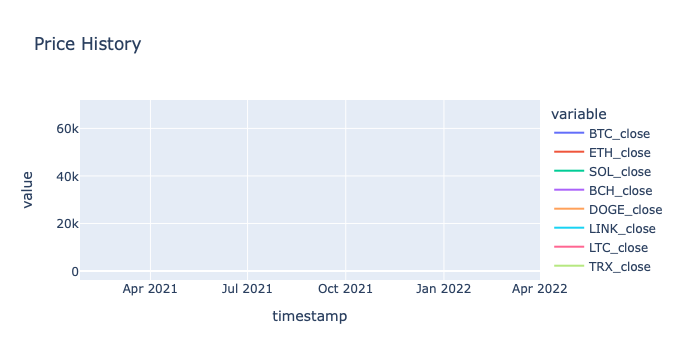

In [12]:
# Display daily closing price line plot

cypto_price_plot = px.line(
crypto_prices, title="Price History")

cypto_price_plot

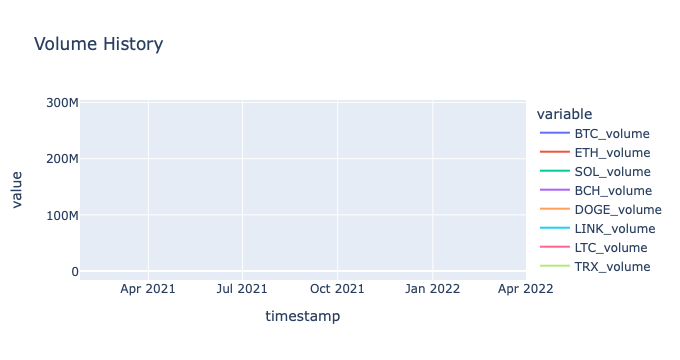

In [13]:
# Display daily volume line plot

crypto_vol_plot = px.line(
crypto_volume, title="Volume History")

crypto_vol_plot

In [14]:
# Calculate Daily Returns for Closing Price

daily_returns = crypto_prices.pct_change()

daily_returns = daily_returns.dropna()

daily_returns.head()

BTC_close  ETH_close  SOL_close  BCH_close  DOGE_close  \
timestamp                                                            
2021-01-26  -0.016777  -0.024143  -0.014455  -0.057882   -0.053786   
2021-01-27  -0.036277  -0.035136  -0.001333  -0.029442    0.460234   
2021-01-28   0.087009   0.051911  -0.014686   0.042859    4.785363   
2021-01-29   0.036587   0.057064   0.038618  -0.012033   -0.536721   
2021-01-30   0.001562  -0.020422   0.159165   0.025858   -0.122574   

            LINK_close  LTC_close  TRX_close  UNI_close  BAT_close  
timestamp                                                           
2021-01-26   -0.049810  -0.052481  -0.030815   0.108976  -0.031311  
2021-01-27    0.060158   0.004789   0.001220   0.056884   0.096097  
2021-01-28   -0.056809   0.037826   0.072473   0.036250  -0.062634  
2021-01-29    0.006519  -0.000593   0.031070   0.021430   0.002883  
2021-01-30    0.042157  -0.009636  -0.014949   0.225686   0.050478

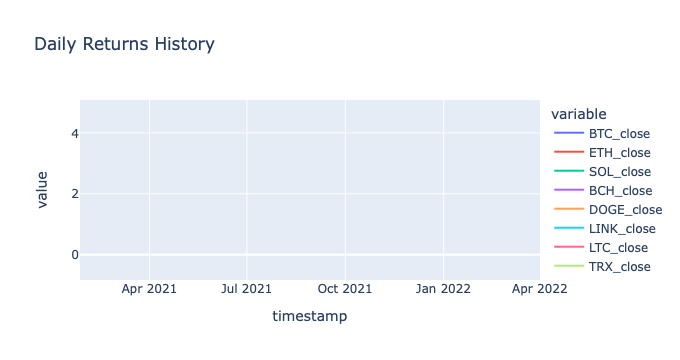

In [15]:
# Display Daily Returns Plot


daily_returns_plot = px.line(
daily_returns, title="Daily Returns History")

daily_returns_plot



<AxesSubplot:title={'center':'Daily Close Distribution'}, ylabel='Density'>

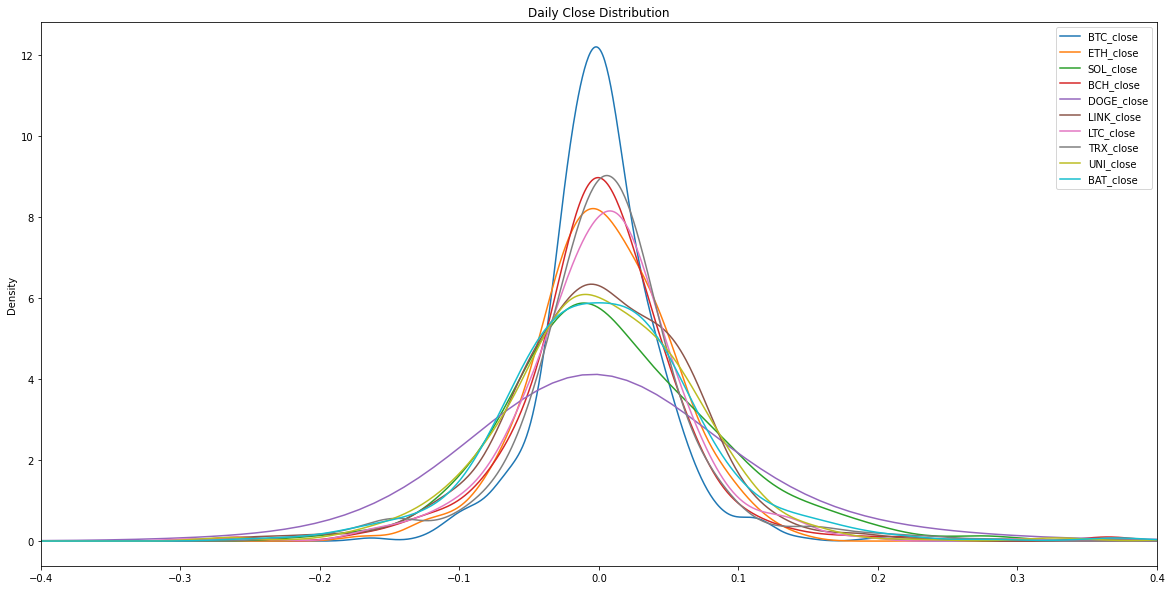

In [16]:
#Daily returns daily close distribution
daily_returns.plot.density(xlim=(-0.4,0.4), title="Daily Close Distribution", figsize=(20, 10))

In [17]:
#Daily returns standard dev
daily_returns_std = daily_returns.std()
daily_returns_std

BTC_close     0.040622
ETH_close     0.050998
SOL_close     0.077331
BCH_close     0.061095
DOGE_close    0.249655
LINK_close    0.064855
LTC_close     0.059423
TRX_close     0.061064
UNI_close     0.072029
BAT_close     0.080119
dtype: float64

In [18]:
#Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns_std * np.sqrt(252))
sharpe_ratios.head()

BTC_close     0.657667
ETH_close     1.105038
SOL_close     2.299337
BCH_close     0.396463
DOGE_close    1.142034
dtype: float64

<AxesSubplot:title={'center':'Crypto Sharp Ratios'}>

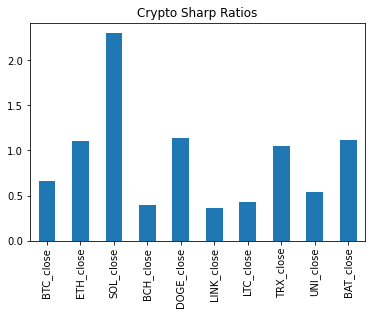

In [19]:
#Sharp Ratio plot - get this one together!!!!!
sharpe_ratios.plot(kind="bar",title="Crypto Sharp Ratios")

In [20]:
daily_std = daily_returns.std()
daily_std.head()

BTC_close     0.040622
ETH_close     0.050998
SOL_close     0.077331
BCH_close     0.061095
DOGE_close    0.249655
dtype: float64

In [21]:
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

DOGE_close    0.249655
BAT_close     0.080119
SOL_close     0.077331
UNI_close     0.072029
LINK_close    0.064855
dtype: float64

In [22]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

DOGE_close    3.963152
BAT_close     1.271848
SOL_close     1.227586
UNI_close     1.143422
LINK_close    1.029544
BCH_close     0.969852
TRX_close     0.969359
LTC_close     0.943313
ETH_close     0.809571
BTC_close     0.644862
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Dev Returns'}>

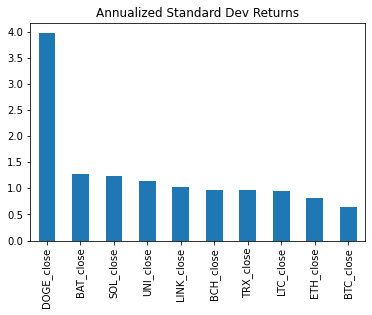

In [23]:
annualized_std.plot(kind="bar", title="Annualized Standard Dev Returns")

In [24]:
# Calculate covariance of all daily returns of crypto vs. BTC

doge_covariance = daily_returns['DOGE_close'].cov(daily_returns['BTC_close'])
bat_covariance = daily_returns['BAT_close'].cov(daily_returns['BTC_close'])
sol_covariance = daily_returns['SOL_close'].cov(daily_returns['BTC_close'])
uni_covariance = daily_returns['UNI_close'].cov(daily_returns['BTC_close'])
link_covariance = daily_returns['LINK_close'].cov(daily_returns['BTC_close'])
bch_covariance = daily_returns['BCH_close'].cov(daily_returns['BTC_close'])
trx_covariance = daily_returns['TRX_close'].cov(daily_returns['BTC_close'])
eth_covariance = daily_returns['ETH_close'].cov(daily_returns['BTC_close'])
ltc_covariance = daily_returns['LTC_close'].cov(daily_returns['BTC_close'])

In [25]:
# Calculate variance of all daily returns of crypto vs. BTC
variance = daily_returns['BTC_close'].var()
variance

0.001650187035758345

In [26]:
# Calculate beta of all daily returns of crypto vs BTC
doge_beta = doge_covariance / variance
bat_beta = bat_covariance / variance
sol_beta = sol_covariance / variance
uni_beta = uni_covariance / variance
link_beta = link_covariance / variance
bch_beta = bch_covariance / variance
trx_beta = trx_covariance / variance
eth_beta = eth_covariance / variance
ltc_beta = ltc_covariance / variance

print(f"DOGE: {doge_beta} | BAT: {bat_beta} | SOL: {sol_beta} UNI: {uni_beta} | LINK: {link_beta} | BCH: {bch_beta} TRX: {trx_beta} | ETH: {eth_beta} | LTC: {ltc_beta}")

DOGE: 1.4975448256891324 | BAT: 1.17335362740414 | SOL: 0.8644804967845938 UNI: 1.1403736180822663 | LINK: 1.149330301320555 | BCH: 1.089131798753995 TRX: 1.0032497303725523 | ETH: 1.0439136863376526 | LTC: 1.1140706284307333


In [27]:
# Calculate 30-day rolling covariance of Crypto vs. BTC and plot the data
rolling_doge_covariance = daily_returns['DOGE_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_bat_covariance = daily_returns['BAT_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_sol_covariance = daily_returns['SOL_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_uni_covariance = daily_returns['UNI_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_link_covariance = daily_returns['LINK_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_bch_covariance = daily_returns['BCH_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_trx_covariance = daily_returns['TRX_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_eth_covariance = daily_returns['ETH_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_ltc_covariance = daily_returns['LTC_close'].rolling(window=30).cov(daily_returns['BTC_close'])


# Calculate 30-day rolling variance of BTC
rolling_variance = daily_returns['BTC_close'].rolling(window=30).var()

# Calculate 30-day rolling beta of CRYPTOS and plot the data
rolling_doge_beta = rolling_doge_covariance / rolling_variance
rolling_bat_beta = rolling_bat_covariance / rolling_variance
rolling_sol_beta = rolling_sol_covariance / rolling_variance
rolling_uni_beta = rolling_uni_covariance / rolling_variance
rolling_link_beta = rolling_link_covariance / rolling_variance
rolling_bch_beta = rolling_bch_covariance / rolling_variance
rolling_trx_beta = rolling_trx_covariance / rolling_variance
rolling_eth_beta = rolling_eth_covariance / rolling_variance
rolling_ltc_beta = rolling_ltc_covariance / rolling_variance

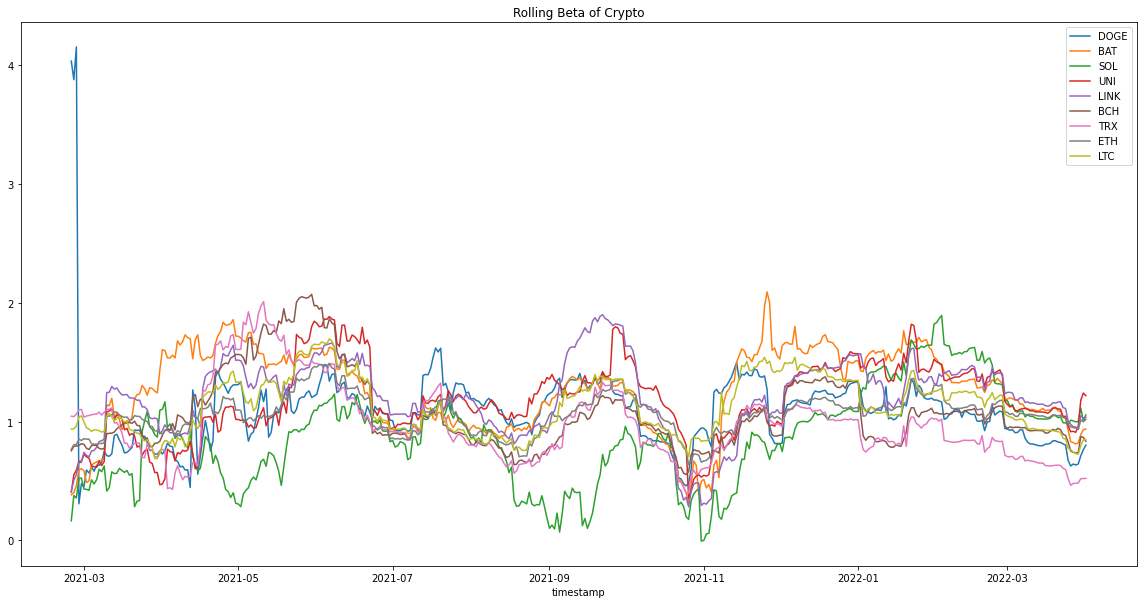

In [28]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_doge_beta.plot(figsize=(20, 10), title='Rolling Beta of Crypto')
rolling_bat_beta.plot(ax=ax)
rolling_sol_beta.plot(ax=ax)
rolling_uni_beta.plot(ax=ax)
rolling_link_beta.plot(ax=ax)
rolling_bch_beta.plot(ax=ax)
rolling_trx_beta.plot(ax=ax)
rolling_eth_beta.plot(ax=ax)
rolling_ltc_beta.plot(ax=ax)
# Set the legend of the figure
ax.legend(["DOGE", "BAT", "SOL","UNI", "LINK", "BCH","TRX","ETH", "LTC"])

In [29]:
# Above graph was not able to be defined in a function for the dashboard. 
# To overcome this we concated the data into a single DF to be able to show up in the dashboard.

total_beta = pd.concat([rolling_doge_beta, rolling_bat_beta, rolling_sol_beta, rolling_uni_beta, rolling_link_beta, rolling_bch_beta, rolling_trx_beta, rolling_eth_beta, rolling_ltc_beta], axis="columns", join="inner")
total_beta = total_beta.rename(columns = {0 : "DOGE", 1 : "BAT", 2 : "SOL", 3 : "UNI", 4 : "LINK", 5 : "BCH", 6 : "TRX", 7 : "ETH", 8 : "LTC"})

total_beta

DOGE       BAT       SOL       UNI      LINK       BCH  \
timestamp                                                                
2021-01-26       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-27       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-28       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-29       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-30       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-03-28  0.635566  0.813055  0.998157  0.910441  0.955139  0.737918   
2022-03-29  0.644006  0.821479  1.002183  0.964502  0.935460  0.740228   
2022-03-30  0.712511  0.891714  1.116264  1.181285  1.050606  0.874105   
2022-03-31  0.763383  0.931973  1.000758  1.241250  1.032326  0.867923   
2022-04-01  0.801482  0.937465  1.056744  1.219411  1.036187  0.834837   

                 TRX       ETH       LTC  
timestamp                                 
2021-01-26       NaN       NaN       NaN  
2021-01-27       NaN       NaN       NaN  
2021-01-28       NaN       NaN       NaN  
2021-01-29       NaN       NaN       NaN  
2021-01-30       NaN       NaN       NaN  
...              ...       ...       ...  
2022-03-28  0.481706  0.945852  0.731292  
2022-03-29  0.484035  0.934882  0.726201  
2022-03-30  0.520617  1.013113  0.800675  
2022-03-31  0.521085  1.000586  0.847316  
2022-04-01  0.523349  1.019404  0.848975  

[431 rows x 9 columns]

In [30]:
# Data for rolling windows to make sure it is ready to imput

crypto_prices_7_day=crypto_prices.rolling(window=7).mean()
crypto_prices_30_day=crypto_prices.rolling(window=30).mean()
crypto_prices_90_day=crypto_prices.rolling(window=90).mean()

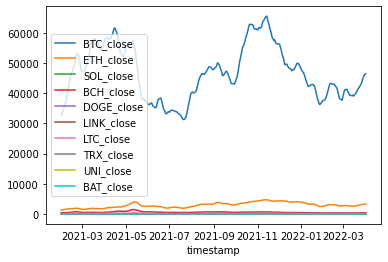

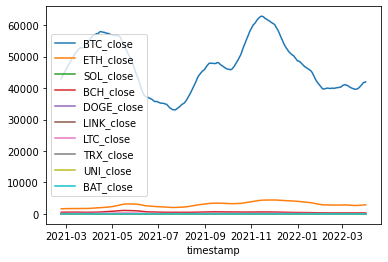

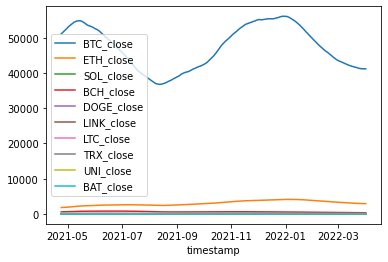

In [31]:
# Graphing rolling windows 
seven_day=crypto_prices.rolling(window=7).mean().plot()
thirty_day=crypto_prices.rolling(window=30).mean().plot()
ninety_day=crypto_prices.rolling(window=90).mean().plot()

In [32]:
# Define Panel Visualization Functions
      
    
def price_history():
    cypto_price_plot = px.line(
    crypto_prices, title='Price History')
    
    return cypto_price_plot



def volume_history():
    crypto_vol_plot = px.line(
    crypto_volume, title='Volume History')

    return crypto_vol_plot



def crypto_daily_returns():
    daily_returns_plot = px.line(
    daily_returns, title='Daily Returns History')

    return daily_returns_plot


def std_annualized():
    anplot = px.bar(
    annualized_std, title="Annualized Standard Dev Returns")
    
    return anplot



def sharpe():
    sratio = px.bar(
    sharpe_ratios, title="Crypto Sharpe Ratios")
    
    return sratio



#def daily_returns_risk():
    #dr_risk = px.histogram(
    #daily_returns,
    #range_x = (-0.4, 0.4),
    #title="Daily Close Distribution")
    
    #return dr_risk



def rolling_beta():
    beta = px.line(
    total_beta, title='Rolling Beta of Crypto')
      
    return beta



def rolling_7():
    rl_7day = px.line(
    crypto_prices_7_day, title="Seven Day Rolling Average")

    return rl_7day



def rolling_30():
    rl_30day = px.line(
    crypto_prices_30_day, title="Thirty Day Rolling Average")

    return rl_30day



def rolling_90():
    rl_90day = px.line(
    crypto_prices_90_day, title="Ninety Day Rolling Average")

    return rl_90day

In [33]:
# Create Dashboard

market_plots = pn.Column(
    "## Crypto Market Overview", 
    price_history(),
    volume_history(),
    crypto_daily_returns()
)



std_risk = pn.Column(
    "## Risk Data",
    std_annualized(),
    sharpe(),
    #daily_returns_risk(),
    rolling_beta()
)



rolling_data = pn.Column(
    "## Rolling Data",
    rolling_7(),
    rolling_30(),
    rolling_90()
)



In [34]:
dashboard = pn.Tabs(
    ("Crypto Market Overview", market_plots),
    ("Risk Data", std_risk),
    ("Rolling Data", rolling_data),
    background="white")



# Create the dashboard
dashboard

Tabs(background='white')
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)

<AxesSubplot:title={'center':'Daily Close Distribution'}, ylabel='Density'>

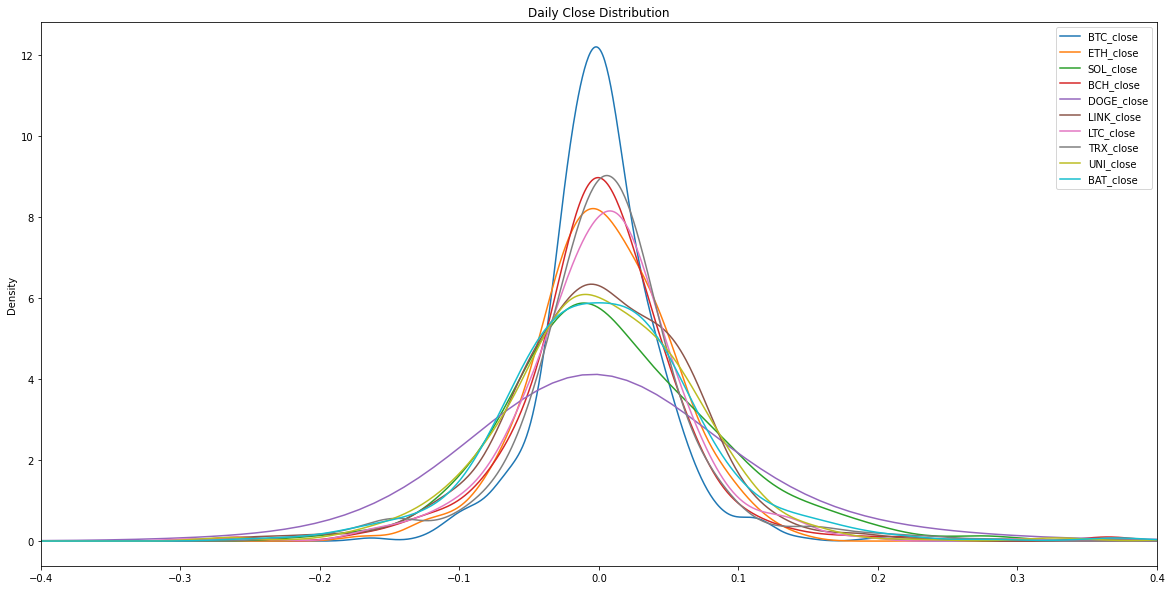

In [35]:
#Daily returns daily close distribution
daily_returns.plot.density(xlim=(-0.4,0.4), title="Daily Close Distribution", figsize=(20, 10))

In [36]:
# Set timeframe for MC simulation

start_date = pd.Timestamp('2021-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-01', tz='America/New_York').isoformat()

In [37]:
# Get 1+ years' worth of historical data for Cryptos
timeframe = "1Day"
ticker = ['BTCUSD', 'ETHUSD', 'LTCUSD']

df_crypto = api.get_crypto_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Display sample data
df_crypto.head()

exchange      open      high      low     close  \
timestamp                                                                   
2021-04-01 05:00:00+00:00     CBSE  58925.14  59474.94  57930.0  58726.48   
2021-04-01 05:00:00+00:00     FTXU  58934.00  60140.00  57957.0  59512.00   
2021-04-02 05:00:00+00:00     CBSE  58981.04  59479.00  58941.2  59401.81   
2021-04-02 05:00:00+00:00     FTXU  59617.00  59693.00  58426.0  59418.00   
2021-04-03 05:00:00+00:00     CBSE  59401.80  59752.00  56943.0  57094.34   

                                volume  trade_count          vwap  symbol  
timestamp                                                                  
2021-04-01 05:00:00+00:00  9045.875749       261187  58781.333267  BTCUSD  
2021-04-01 05:00:00+00:00   218.768700          825  59124.011882  BTCUSD  
2021-04-02 05:00:00+00:00  1262.043832        44534  59265.632540  BTCUSD  
2021-04-02 05:00:00+00:00   202.617600          715  59253.927912  BTCUSD  
2021-04-03 05:00:00+00:00  6764.195498       190378  58396.104662  BTCUSD

In [38]:
BTC = df_crypto[df_crypto['symbol']=='BTCUSD'].drop('symbol', axis=1)
ETH = df_crypto[df_crypto['symbol']=='ETHUSD'].drop('symbol', axis=1)
#SOL = df_crypto[df_crypto['symbol']=='SOLUSD'].drop('symbol', axis=1)
#BCH = df_crypto[df_crypto['symbol']=='BCHUSD'].drop('symbol', axis=1)
#DOGE = df_crypto[df_crypto['symbol']=='DOGEUSD'].drop('symbol', axis=1)
#LINK = df_crypto[df_crypto['symbol']=='LINKUSD'].drop('symbol', axis=1)
LTC = df_crypto[df_crypto['symbol']=='LTCUSD'].drop('symbol', axis=1)
#TRX = df_crypto[df_crypto['symbol']=='TRXUSD'].drop('symbol', axis=1)
#UNI = df_crypto[df_crypto['symbol']=='UNIUSD'].drop('symbol', axis=1)
#BAT = df_crypto[df_crypto['symbol']=='BATUSD'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_crypto_data = pd.concat([BTC, ETH, LTC], axis=1, keys=["BTC", "ETH", "LTC"])
# Display sample data
df_crypto_data.head()

BTC                                         \
                          exchange      open      high      low     close   
timestamp                                                                   
2021-04-01 05:00:00+00:00     CBSE  58925.14  59474.94  57930.0  58726.48   
2021-04-01 05:00:00+00:00     FTXU  58934.00  60140.00  57957.0  59512.00   
2021-04-02 05:00:00+00:00     CBSE  58981.04  59479.00  58941.2  59401.81   
2021-04-02 05:00:00+00:00     FTXU  59617.00  59693.00  58426.0  59418.00   
2021-04-03 05:00:00+00:00     CBSE  59401.80  59752.00  56943.0  57094.34   

                                                                      ETH  \
                                volume trade_count          vwap exchange   
timestamp                                                                   
2021-04-01 05:00:00+00:00  9045.875749      261187  58781.333267     CBSE   
2021-04-01 05:00:00+00:00   218.768700         825  59124.011882     FTXU   
2021-04-02 05:00:00+00:00  1262.043832       44534  59265.632540     CBSE   
2021-04-02 05:00:00+00:00   202.617600         715  59253.927912     FTXU   
2021-04-03 05:00:00+00:00  6764.195498      190378  58396.104662     CBSE   

                                    ...                               LTC  \
                              open  ... trade_count         vwap exchange   
timestamp                           ...                                     
2021-04-01 05:00:00+00:00  1968.74  ...       55684  1986.437501     CBSE   
2021-04-01 05:00:00+00:00  1916.60  ...         423  1985.019261     FTXU   
2021-04-02 05:00:00+00:00  2134.38  ...       53242  2106.813277     CBSE   
2021-04-02 05:00:00+00:00  1996.50  ...         309  2077.868974     FTXU   
2021-04-03 05:00:00+00:00  2099.35  ...      156286  2065.778039     CBSE   

                                                                             \
                              open    high      low    close         volume   
timestamp                                                                     
2021-04-01 05:00:00+00:00  202.740  208.75  200.790  205.390   86261.635883   
2021-04-01 05:00:00+00:00  195.905  208.60  194.725  204.665     154.780000   
2021-04-02 05:00:00+00:00  211.400  214.71  209.510  212.360   49204.278608   
2021-04-02 05:00:00+00:00  204.780  214.40  202.090  212.320     709.020000   
2021-04-03 05:00:00+00:00  212.350  217.88  195.050  195.340  265497.842033   

                                                   
                          trade_count        vwap  
timestamp                                          
2021-04-01 05:00:00+00:00       19877  205.144833  
2021-04-01 05:00:00+00:00          78  201.460014  
2021-04-02 05:00:00+00:00       14176  211.916876  
2021-04-02 05:00:00+00:00          93  211.161978  
2021-04-03 05:00:00+00:00       61791  207.041969  

[5 rows x 24 columns]

In [39]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [40]:
MC_one_year = MCSimulation(
    df_crypto_data,
    weights = [.40, .30, .30],
    num_simulation = 500,
    num_trading_days = 365)

In [41]:
# Printing the simulation input data
MC_one_year.portfolio_data.head()

BTC                                         \
                          exchange      open      high      low     close   
timestamp                                                                   
2021-04-01 05:00:00+00:00     CBSE  58925.14  59474.94  57930.0  58726.48   
2021-04-01 05:00:00+00:00     CBSE  58925.14  59474.94  57930.0  58726.48   
2021-04-01 05:00:00+00:00     FTXU  58934.00  60140.00  57957.0  59512.00   
2021-04-01 05:00:00+00:00     FTXU  58934.00  60140.00  57957.0  59512.00   
2021-04-02 05:00:00+00:00     CBSE  58981.04  59479.00  58941.2  59401.81   

                                                                               \
                                volume trade_count          vwap daily_return   
timestamp                                                                       
2021-04-01 05:00:00+00:00  9045.875749      261187  58781.333267          NaN   
2021-04-01 05:00:00+00:00  9045.875749      261187  58781.333267     0.013376   
2021-04-01 05:00:00+00:00   218.768700         825  59124.011882          NaN   
2021-04-01 05:00:00+00:00   218.768700         825  59124.011882     0.013376   
2021-04-02 05:00:00+00:00  1262.043832       44534  59265.632540    -0.001852   

                               ETH  ...                   LTC           \
                          exchange  ... daily_return exchange     open   
timestamp                           ...                                  
2021-04-01 05:00:00+00:00     CBSE  ...          NaN     CBSE  202.740   
2021-04-01 05:00:00+00:00     CBSE  ...    -0.003063     CBSE  202.740   
2021-04-01 05:00:00+00:00     FTXU  ...          NaN     FTXU  195.905   
2021-04-01 05:00:00+00:00     FTXU  ...    -0.003063     FTXU  195.905   
2021-04-02 05:00:00+00:00     CBSE  ...     0.055799     CBSE  211.400   

                                                                               \
                             high      low    close        volume trade_count   
timestamp                                                                       
2021-04-01 05:00:00+00:00  208.75  200.790  205.390  86261.635883       19877   
2021-04-01 05:00:00+00:00  208.75  200.790  205.390  86261.635883       19877   
2021-04-01 05:00:00+00:00  208.60  194.725  204.665    154.780000          78   
2021-04-01 05:00:00+00:00  208.60  194.725  204.665    154.780000          78   
2021-04-02 05:00:00+00:00  214.71  209.510  212.360  49204.278608       14176   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-04-01 05:00:00+00:00  205.144833          NaN  
2021-04-01 05:00:00+00:00  205.144833    -0.003530  
2021-04-01 05:00:00+00:00  201.460014          NaN  
2021-04-01 05:00:00+00:00  201.460014    -0.003530  
2021-04-02 05:00:00+00:00  211.916876     0.037598  

[5 rows x 27 columns]

In [42]:
# Running a Monte Carlo simulation to forecast 1 years cumulative returns
MC_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 110.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 120.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 130.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 140.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 150.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 160.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 170.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 180.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 190.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 200.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 210.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 220.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 230.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 240.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 250.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 260.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 270.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 280.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 290.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 300.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 310.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 320.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 330.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 340.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 350.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 360.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 370.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 380.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 390.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 400.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 410.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 420.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 430.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 440.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 450.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 460.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 470.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 480.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

Running Monte Carlo simulation number 490.


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.028589  0.987450  0.979149  1.005293  1.032177  1.002519  0.999227   
2    0.992679  0.970015  0.963813  1.017356  1.041684  1.003293  1.004730   
3    0.985824  0.976247  0.959889  0.985215  1.014247  1.012756  0.997744   
4    1.011749  0.954875  0.974374  0.974100  1.010390  0.998482  0.999521   
..        ...       ...       ...       ...       ...       ...       ...   
361  1.406555  0.637384  1.122956  1.654281  1.626632  1.052848  0.972838   
362  1.428593  0.634746  1.139210  1.640645  1.658183  1.054106  0.950168   
363  1.421161  0.635637  1.109477  1.631365  1.683956  1.051066  0.914096   
364  1.432164  0.646268  1.089603  1.599161  1.727956  1.050910  0.878388   
365  1.451610  0.647575  1.063832  1.596680  1.685332  1.020542  0.896383   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.985543  0.963461  0.999388  ...  1.007916  1.016103  1.037286   
2    0.970283  0.975459  1.011111  ...  1.002964  1.045829  1.078365   
3    0.964735  0.968346  0.982838  ...  1.007109  1.027421  1.065511   
4    0.973603  0.948961  0.959246  ...  1.006735  1.039529  1.053143   
..        ...       ...       ...  ...       ...       ...       ...   
361  1.133872  1.206214  0.900657  ...  1.291593  1.017200  0.964634   
362  1.118524  1.211606  0.909325  ...  1.275789  1.015327  0.972342   
363  1.068151  1.197504  0.895051  ...  1.274444  1.030072  0.971646   
364  1.022044  1.175658  0.884537  ...  1.287096  1.033443  0.958763   
365  1.022164  1.180386  0.865674  ...  1.267024  1.048233  0.961064   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.992758  0.996153  0.994395  0.995123  0.990850  1.010105  0.985381  
2    0.983241  1.008061  0.985811  0.977902  0.983360  0.998906  0.977207  
3    0.940488  1.009045  1.009856  0.991999  0.987564  0.981315  0.980819  
4    0.950369  1.004298  1.000758  0.985755  0.974035  0.971766  0.976880  
..        ...       ...       ...       ...       ...       ...       ...  
361  0.716634  0.734338  0.739369  1.178299  0.968011  1.084362  0.811755  
362  0.730254  0.719369  0.734489  1.161652  0.981488  1.113568  0.801512  
363  0.743215  0.708009  0.725717  1.160768  0.978795  1.120481  0.774034  
364  0.732630  0.725793  0.722403  1.159185  0.969604  1.126335  0.769203  
365  0.728569  0.727509  0.728554  1.188198  0.985654  1.117624  0.777033  

[366 rows x 500 columns]

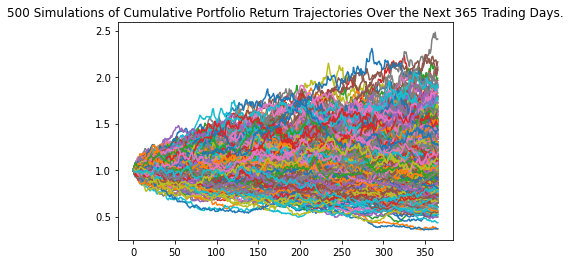

In [43]:
# Plot simulation outcomes
line_plot = MC_one_year.plot_simulation()

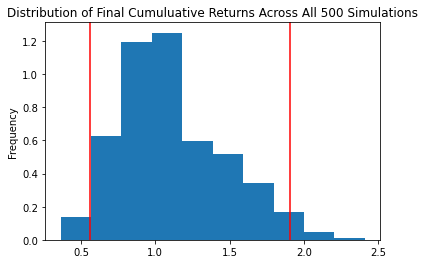

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_one_year.plot_distribution()


In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_one_year.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              1.114532
std               0.351734
min               0.363125
25%               0.866400
50%               1.047931
75%               1.343146
max               2.409053
95% CI Lower      0.560682
95% CI Upper      1.903660
Name: 365, dtype: float64


/Users/mattpretel/Desktop/Project_1/MCForecastTools.py:172: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [46]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)



In [47]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next year will end within in the range of $5606.82 and $19036.6
